In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [2]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [98]:
def format_tradetime(tradetime):
    m = {
        'JAN': '1',
        'FEB': '2',
        'MAR': '3',
        'APR': '4',
        'MAY': '5',
        'JUN': '6',
        'JUL': '7',
        'AUG': '8',
        'SEP': '9',
        'OCT': '10',
        'NOV': '11',
        'DEC': '12'
    }
    day = tradetime[0:2]
    month = m[tradetime[2:5]]
    year = '20' + tradetime[5:7]
    hour = tradetime[8:10]
    
    dt = pd.to_datetime(year+'-'+month+'-'+day+' '+hour+':00:00')
    return int(dt.strftime('%s'))

raw_df['tradetime'] = raw_df.TRDATETIME.apply(format_tradetime)
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,day_of_transaction,tradetime
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0,6,1508533200
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,4,1507798800
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0,2,1512421200
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0,6,1508533200
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,2,1508839200


In [99]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 12 columns):
PERIOD                490513 non-null object
cl_id                 490513 non-null int64
MCC                   490513 non-null int64
channel_type          487603 non-null object
currency              490513 non-null int64
TRDATETIME            490513 non-null object
amount                490513 non-null float64
trx_category          490513 non-null object
target_flag           490513 non-null int64
target_sum            490513 non-null float64
day_of_transaction    490513 non-null object
tradetime             490513 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 44.9+ MB


In [28]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
6. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части + указанием места в leaderboard при решении дополнительной

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

In [31]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack()

In [32]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') ) 
    tmp_df = dataset.groupby(['cl_id','day_of_transaction'])['day_of_transaction'].size().unstack().fillna(0).reset_index()
    old_columns = [old_col for old_col in tmp_df.columns.tolist() if old_col in dataset['day_of_transaction'].unique()]
    tmp_df.rename(columns={old_col: 'day_' + old_col for old_col in old_columns}, inplace=True)
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H') ) 
    return dataset.groupby(['cl_id','hour_of_transaction'])['hour_of_transaction'].size().unstack().fillna(0).reset_index()

In [9]:
transaction_by_day_count(raw_df)

day_of_transaction,cl_id,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
1,1,7.0,20.0,20.0,16.0,16.0,10.0,15.0
2,5,15.0,19.0,19.0,15.0,25.0,24.0,25.0
3,9,5.0,8.0,7.0,5.0,6.0,4.0,4.0
4,10,74.0,35.0,62.0,68.0,65.0,57.0,102.0
5,11,28.0,29.0,30.0,25.0,40.0,40.0,25.0
6,14,14.0,22.0,12.0,15.0,30.0,39.0,4.0
7,20,6.0,10.0,15.0,13.0,22.0,7.0,4.0
8,21,22.0,6.0,13.0,18.0,16.0,36.0,13.0
9,22,15.0,6.0,0.0,1.0,12.0,11.0,14.0


In [33]:
import sqlite3

In [34]:
conn = sqlite3.connect('tran.db')

In [100]:
raw_df.to_sql('transactions_raw', if_exists='replace', con=conn)

In [101]:
check = pd.io.sql.read_sql("""
    select * from transactions_raw limit 100
    """, conn
)
check.head()

,index,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,day_of_transaction,tradetime
0,0,01/10/2017,0,5200,None,810,21OCT17:00:00:00,5023.0,POS,0,0.0,6,1508533200
1,1,01/10/2017,0,6011,None,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,4,1507798800
2,2,01/12/2017,0,5921,None,810,05DEC17:00:00:00,767.0,POS,0,0.0,2,1512421200
3,3,01/10/2017,0,5411,None,810,21OCT17:00:00:00,2031.0,POS,0,0.0,6,1508533200
4,4,01/10/2017,0,6012,None,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,2,1508839200


In [102]:
pd.io.sql.read_sql("""
    PRAGMA table_info(transactions_raw)
""", conn
)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,PERIOD,TEXT,0,None,0
2,2,cl_id,INTEGER,0,None,0
3,3,MCC,INTEGER,0,None,0
4,4,channel_type,TEXT,0,None,0
5,5,currency,INTEGER,0,None,0
6,6,TRDATETIME,TEXT,0,None,0
7,7,amount,REAL,0,None,0
8,8,trx_category,TEXT,0,None,0
9,9,target_flag,INTEGER,0,None,0


In [103]:
pd.io.sql.read_sql("""
    select count(*), count(distinct cl_id) from transactions_raw
""", conn)

,count(*),count(distinct cl_id)
0,490513,5000


In [39]:
raw_df.MCC.value_counts().head()

5411    121640
6011     54382
5814     41351
5812     30027
5499     27237
Name: MCC, dtype: int64

In [108]:
agg = pd.io.sql.read_sql("""
    select
        cl_id,
        target_flag,
        min(tradetime) as begin_use,
        max(tradetime) as end_use,
        max(tradetime) - min(tradetime) as dur,
        (max(tradetime) - min(tradetime))/10 as dur10,
        
        sum(case when MCC = 5411 then 1 else 0 end) as trx_mcc_5411,
        sum(case when MCC = 6011 then 1 else 0 end) as trx_mcc_6011,
        sum(case when MCC = 5814 then 1 else 0 end) as trx_mcc_5814,
        sum(case when MCC = 5812 then 1 else 0 end) as trx_mcc_5812,
        sum(case when MCC = 5499 then 1 else 0 end) as trx_mcc_5499,
        count(*) as all_trx
    from transactions_raw
    group by 1, 2
    order by 1
""", conn)

In [111]:
agg.head()

,cl_id,target_flag,begin_use,end_use,dur,dur10,trx_mcc_5411,trx_mcc_6011,trx_mcc_5814,trx_mcc_5812,trx_mcc_5499,all_trx
0,0,0,1507798800,1512421200,4622400,462240,1,1,0,0,0,5
1,1,0,1500411600,1508360400,7948800,794880,12,3,41,19,2,104
2,5,1,1489784400,1497733200,7948800,794880,31,22,1,2,8,142
3,9,0,1493758800,1501502400,7743600,774360,1,7,0,0,0,39
4,10,0,1498856400,1506564000,7707600,770760,103,66,4,2,30,463


In [112]:
agg.to_sql('agg_trx', if_exists='replace', con=conn)

In [113]:
pd.io.sql.read_sql("""
    PRAGMA table_info(agg_trx)
""", conn
)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,cl_id,INTEGER,0,None,0
2,2,target_flag,INTEGER,0,None,0
3,3,begin_use,INTEGER,0,None,0
4,4,end_use,INTEGER,0,None,0
5,5,dur,INTEGER,0,None,0
6,6,dur10,INTEGER,0,None,0
7,7,trx_mcc_5411,INTEGER,0,None,0
8,8,trx_mcc_6011,INTEGER,0,None,0
9,9,trx_mcc_5814,INTEGER,0,None,0


In [119]:
agg = pd.io.sql.read_sql("""
select
    a.cl_id,
    a.target_flag,
    --a.begin_use,
    --a.end_use,
    --a.dur,
    a.all_trx,
    sum(case when a.begin_use <= r.tradetime and r.tradetime < (begin_use + a.dur10) then 1 else 0 end) as per1cnt,
    sum(case when (begin_use + a.dur10) <= r.tradetime and r.tradetime < (begin_use + 2*a.dur10) then 1 else 0 end) as per2cnt,
    sum(case when (begin_use + 2*a.dur10) <= r.tradetime and r.tradetime < (begin_use + 3*a.dur10) then 1 else 0 end) as per3cnt,
    sum(case when (begin_use + 3*a.dur10) <= r.tradetime and r.tradetime < (begin_use + 4*a.dur10) then 1 else 0 end) as per4cnt,
    sum(case when (begin_use + 4*a.dur10) <= r.tradetime and r.tradetime < (begin_use + 5*a.dur10) then 1 else 0 end) as per5cnt,
    sum(case when (begin_use + 5*a.dur10) <= r.tradetime and r.tradetime < (begin_use + 6*a.dur10) then 1 else 0 end) as per6cnt,
    sum(case when (begin_use + 6*a.dur10) <= r.tradetime and r.tradetime < (begin_use + 7*a.dur10) then 1 else 0 end) as per7cnt,
    sum(case when (begin_use + 7*a.dur10) <= r.tradetime and r.tradetime < (begin_use + 8*a.dur10) then 1 else 0 end) as per8cnt,
    sum(case when (begin_use + 8*a.dur10) <= r.tradetime and r.tradetime < (begin_use + 9*a.dur10) then 1 else 0 end) as per9cnt,
    sum(case when (begin_use + 9*a.dur10) <= r.tradetime and r.tradetime <= end_use then 1 else 0 end) as per10cnt,

    a.trx_mcc_5411,
    a.trx_mcc_6011,
    a.trx_mcc_5814,
    a.trx_mcc_5812,
    a.trx_mcc_5499
from transactions_raw r
join agg_trx a on a.cl_id = r.cl_id
group by r.cl_id, r.target_flag
order by r.cl_id
""", conn)

In [120]:
agg.head()

,cl_id,target_flag,all_trx,per1cnt,per2cnt,per3cnt,per4cnt,per5cnt,per6cnt,per7cnt,per8cnt,per9cnt,per10cnt,trx_mcc_5411,trx_mcc_6011,trx_mcc_5814,trx_mcc_5812,trx_mcc_5499
0,0,0,5,1,2,1,0,0,0,0,0,0,1,1,1,0,0,0
1,1,0,104,10,2,1,4,3,9,18,33,12,12,12,3,41,19,2
2,5,1,142,13,8,19,12,19,12,17,5,16,21,31,22,1,2,8
3,9,0,39,2,5,8,6,0,1,1,8,5,3,1,7,0,0,0
4,10,0,463,39,40,38,40,60,87,43,39,46,31,103,66,4,2,30


In [121]:
agg.to_sql('features', if_exists='replace', con=conn)

In [122]:
res = pd.io.sql.read_sql("""
select
    target_flag,
    sum(all_trx) as all_trx,
    sum(per1cnt) as per1cnt,
    sum(per2cnt) as per2cnt,
    sum(per3cnt) as per3cnt,
    sum(per4cnt) as per4cnt,
    sum(per5cnt) as per5cnt,
    sum(per6cnt) as per6cnt,
    sum(per7cnt) as per7cnt,
    sum(per8cnt) as per8cnt,
    sum(per9cnt) as per9cnt,
    sum(per10cnt) as per10cnt
from features
group by target_flag
""", conn)
res

,target_flag,all_trx,per1cnt,per2cnt,per3cnt,per4cnt,per5cnt,per6cnt,per7cnt,per8cnt,per9cnt,per10cnt
0,0,170410,25386,17724,16632,16290,16071,16363,15717,14990,14520,16717
1,1,320103,38442,30475,29702,30970,30912,31266,31167,31187,30819,35163


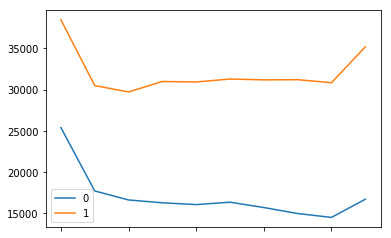

In [131]:
res.transpose().drop(['target_flag', 'all_trx']).plot()

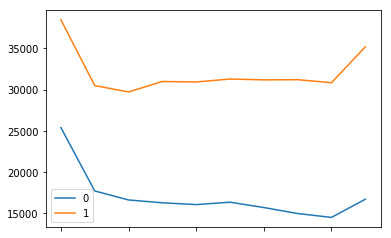

In [132]:
len(agg.cl_id.unique())

5000

Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [133]:
cl_ids_test = np.random.choice(agg.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [135]:
clients_train = agg[~agg.cl_id.isin(cl_ids_test)].copy()
print("Clients in train dataset: ", len(clients_train))
clients_test = agg[agg.cl_id.isin(cl_ids_test)].copy()
print("Clients in test dataset: ", len(clients_test))

Clients in train dataset:  4000
Clients in test dataset:  1000


In [136]:
from sklearn.linear_model import Lasso

In [148]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    # fit
    lassoreg = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors], data['target_flag'])
    y_pred = lassoreg.predict(data[predictors])
    
    #if alpha in models_to_plot:
    #    plt.subplot(models_to_plot[alpha])
    #    plt.tight_layout()
    #    plt.plot(data['x'], y_pred)
    #    plt.plot(data['x'], data['y'], '.')
    #    plt.title('Plot for alpha: %.3g' % alpha)
    
    # format
    rss = sum((y_pred-data['target_flag']) ** 2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [144]:
predictors = ['all_trx'] + ['per%dcnt' % i for i in range(1, 11)] + ['trx_mcc_5411', 'trx_mcc_6011', 'trx_mcc_5814', 'trx_mcc_5812', 'trx_mcc_5499']
predictors

['all_trx',
 'per1cnt',
 'per2cnt',
 'per3cnt',
 'per4cnt',
 'per5cnt',
 'per6cnt',
 'per7cnt',
 'per8cnt',
 'per9cnt',
 'per10cnt',
 'trx_mcc_5411',
 'trx_mcc_6011',
 'trx_mcc_5814',
 'trx_mcc_5812',
 'trx_mcc_5499']

In [145]:
# alphas
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# create dataframe to store coefficients
col = ['rss', 'intercept'] + predictors.copy()
col

['rss',
 'intercept',
 'all_trx',
 'per1cnt',
 'per2cnt',
 'per3cnt',
 'per4cnt',
 'per5cnt',
 'per6cnt',
 'per7cnt',
 'per8cnt',
 'per9cnt',
 'per10cnt',
 'trx_mcc_5411',
 'trx_mcc_6011',
 'trx_mcc_5814',
 'trx_mcc_5812',
 'trx_mcc_5499']

In [146]:
ind = ['alpha_%.2g' % alpha_lasso[i] for i in range(0, 10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [161]:
for i in range(10):
    coef_matrix_lasso.iloc[i, ] = lasso_regression(clients_train, predictors, alpha_lasso[i])

/Users/vvodan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [162]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,all_trx,per1cnt,per2cnt,per3cnt,per4cnt,per5cnt,per6cnt,per7cnt,per8cnt,per9cnt,per10cnt,trx_mcc_5411,trx_mcc_6011,trx_mcc_5814,trx_mcc_5812,trx_mcc_5499
alpha_1e-15,8.8e+02,0.39,0.00048,-0.004,-0.0001,-0.00081,0.00088,0.0014,-0.0012,0.0028,0.0026,0.0011,0.008,-0.0017,0.004,0.0015,0.0018,4.9e-05
alpha_1e-10,8.8e+02,0.39,0.00047,-0.004,-9.1e-05,-0.0008,0.00089,0.0014,-0.0012,0.0028,0.0026,0.0011,0.008,-0.0017,0.004,0.0015,0.0018,4.9e-05
alpha_1e-08,8.8e+02,0.39,0,-0.0035,0.00038,-0.00033,0.0014,0.0019,-0.00076,0.0033,0.0031,0.0015,0.0085,-0.0017,0.004,0.0015,0.0018,4.9e-05
alpha_1e-05,8.8e+02,0.39,0,-0.0033,0.00013,-6.2e-05,0.0012,0.0017,-0.00048,0.0032,0.0031,0.0015,0.0084,-0.0016,0.004,0.0015,0.0018,0
alpha_0.0001,8.8e+02,0.39,0,-0.0021,0,0,0.00036,0.00089,0,0.0024,0.0028,0.0011,0.0079,-0.00095,0.0039,0.0014,0.0018,0
alpha_0.001,9.2e+02,0.46,0.00018,0,0,0,0,0,0,0,0.0011,0,0.0056,0,0.00058,0,0,0
alpha_0.01,9.9e+02,0.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_1,9.9e+02,0.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_5,9.9e+02,0.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_10,9.9e+02,0.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
train_res = Lasso(alpha=1e-5, normalize=True, max_iter=1e5)
train_res.fit(clients_train[predictors], clients_train['target_flag'])

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [166]:
from sklearn.metrics import roc_auc_score

In [174]:
y_test = clients_test['target_flag'].copy()
x_test = clients_test.drop(['target_flag', 'cl_id'], axis=1)

In [176]:
predict = train_res.predict(x_test)

In [177]:
roc_auc_score(y_test, predict)

0.6705312491184802